In [1]:
from __future__ import print_function
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 85s 1ms/step - loss: 0.4963 - acc: 0.8266 - val_loss: 0.3315 - val_acc: 0.8786
Epoch 2/30
60000/60000 [==============================] - 55s 922us/step - loss: 0.3169 - acc: 0.8875 - val_loss: 0.2697 - val_acc: 0.9021
Epoch 3/30
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2713 - acc: 0.9025 - val_loss: 0.2397 - val_acc: 0.9117
Epoch 4/30
60000/60000 [==============================] - 57s 942us/step - loss: 0.2387 - acc: 0.9129 - val_loss: 0.2364 - val_acc: 0.9145
Epoch 5/30
60000/60000 [==============================] - 60s 1ms/step - loss: 0.2130 - acc: 0.9221 - val_loss: 0.2293 - val_acc: 0.9174
Epoch 6/30
60000/60000 [==============================] - 55s 915us/step - loss: 0.1989 - acc: 0.9260 - val_loss: 0.2253 - val_acc: 0.9192
Epoch 7/30
60000/60000 [=========================

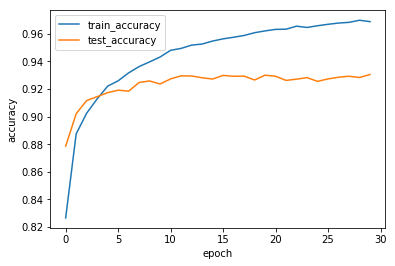

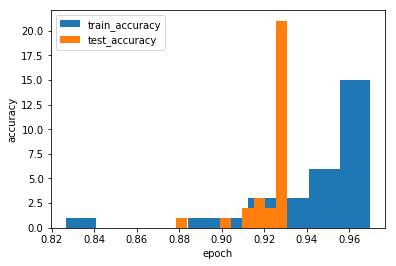

In [4]:
import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(history)

plt.hist(history.history['acc'])
plt.hist(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
plt.show()

In [5]:
print(history.history)

{'val_loss': [0.3315495579957962, 0.2697103892326355, 0.2396715804338455, 0.23641680693626405, 0.2292893506526947, 0.22533405702114107, 0.2290089816093445, 0.2219184334695339, 0.21683957970142365, 0.22033744515180587, 0.2257301327943802, 0.2301691774725914, 0.2259603541612625, 0.23389079716205596, 0.23196174731254576, 0.24416035882234574, 0.23223263840079308, 0.25298621531128884, 0.25908181511163714, 0.26740780838578937, 0.2655435257807374, 0.2849639635384083, 0.2764328955888748, 0.28584867643117906, 0.2822057371497154, 0.26737011898756025, 0.2988872812867165, 0.28357408494949343, 0.30586964218616486, 0.30828567144870755], 'val_acc': [0.8786, 0.9021, 0.9117, 0.9145, 0.9174, 0.9192, 0.9185, 0.9248, 0.9259, 0.9237, 0.9274, 0.9296, 0.9295, 0.9282, 0.9273, 0.9299, 0.9293, 0.9294, 0.9266, 0.9301, 0.9293, 0.9263, 0.9272, 0.9283, 0.9256, 0.9274, 0.9286, 0.9293, 0.9284, 0.9306], 'loss': [0.49625667074521385, 0.31694152692159017, 0.27132424974441527, 0.23873643435637157, 0.21296205841700236, 0.